In [1]:
import numpy as np
import sympy as sp
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt
from scipy.special import iv, kv
import matplotlib.patches as mpatches

In [2]:
# Arcsecond to kpc convertion calculator
def arcsec_to_kpc(arcsec, kpc_per_arcmin):
    kpc_per_arcsec = kpc_per_arcmin / 60
    kpc = arcsec * kpc_per_arcsec
    return kpc
# Example usage NGC 2903
arcsec = 780  
kpc_per_arcmin = 1.86
result = arcsec_to_kpc(arcsec, kpc_per_arcmin)
print(f"{arcsec}'' is approximately {result} kpc")

780'' is approximately 24.180000000000003 kpc


# NFW Profiles

In [3]:
NGC_2403_R = np.array([0.35, 0.71, 1.06, 1.42, 1.77, 2.13, 2.48, 2.83, 3.19, 3.90, 4.61, 5.32, 6.02, 6.73, 7.44, 8.15, 8.86, 9.57, 10.28, 10.99, 11.69, 12.40, 13.11, 13.82, 14.53, 15.24, 15.95, 16.66, 17.36, 18.07, 18.78, 19.49])
NGC_2403_V = np.array([47, 68, 78, 82, 91, 99, 101, 103, 106, 115, 123, 127,127, 127, 127, 128, 128, 128,129, 131, 133, 136, 136, 134, 134, 134,135, 133, 132, 136, 133, 134])
error_2403 = np.array([10,8,6,4,4,4,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,4])

C:\Users\ayush\AppData\Local\Temp\ipykernel_3660\3961296423.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(term1 + term3)


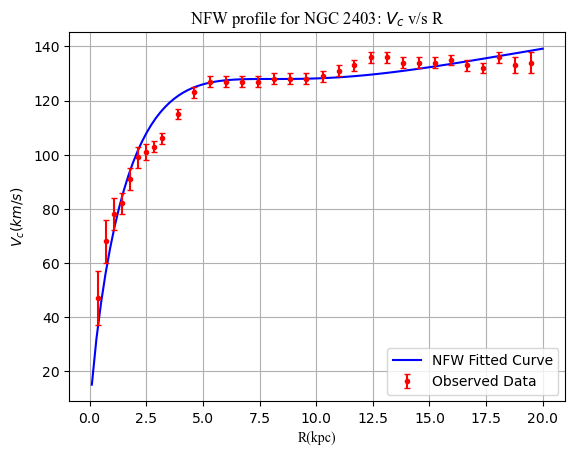

The opptimized values are: u_1=33.553963429508435 and u_2= 68.7337533987041 


In [4]:
R_D = 2.05  
u_0 = 27055.39593
def calculate_v(r, u_1, u_2):#NGC 2403
    y = r / (2 * R_D)
    a = r/u_2
    b = u_1 * u_2 ** 3
    c = b/r
    term1 = u_0 * R_D * y**2 * (iv(0, y) * kv(0, y) - iv(1, y) * kv(1, y))
    z= np.log(1 + a)
    term2= z - a/(1+a)
    term3 = c * term2
    return np.sqrt(term1 + term3)
# Perform curve fitting
popt, pcov = curve_fit(calculate_v, NGC_2403_R, NGC_2403_V, p0=[100, 15])
# Get the optimized parameters
u_1_opt, u_2_opt = popt
# Generate the fitted curve using optimized parameters
r_values = np.linspace(0.1, 20, 100)
v_values = calculate_v(r_values, u_1_opt, u_2_opt)
# Plotting the graph
plt.plot(r_values, v_values, '-',color = 'Blue', label='NFW Fitted Curve')
plt.errorbar(NGC_2403_R, NGC_2403_V, yerr=error_2403, fmt='.',color = 'Red',capsize=2, label='Observed Data')
plt.xlabel('R(kpc)',fontfamily='Times New Roman')
plt.ylabel(r'$V_c(km/s)$', fontfamily='Times New Roman')
plt.title(r'NFW profile for NGC 2403: $V_c$ v/s R',fontfamily='Times New Roman')
plt.grid(True)
plt.legend()
#plt.savefig('NFW2403.png')
plt.show()
print(f"The opptimized values are: u_1={u_1_opt} and u_2= {u_2_opt} ")

In [5]:
'''def calculate_v(r, r_c, rho_0):
    t = (r / r_c)
    t1 = t * (1 + t) ** 2
    rhor = rho_0 / t1
    return (rhor)

r_values = np.geomspace(0.1, 100, 1000)  # Generate points in geometric progression
r_c = 68.7337533987041
rho_0 = 33.553963429508435
v_values = calculate_v(r_values, r_c, rho_0)

# Calculate the logarithms of the values
log_rhor_rho_0 = np.log(v_values / rho_0)
log_r_r_c = np.log(r_values / r_c)

# Set the tick locations and labels for x-axis and y-axis
x_ticks = np.log(np.array([10**(-4),10**(-3),10**(-2),10**(-1), 1, 10])) 
x_labels = ['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$', '$10^{0}$', '10']
plt.xticks(x_ticks, x_labels)

y_ticks = np.log(np.array([10**(-2),10**(-1), 1, 10,10**(2),10**(3),10**(4)])) 
y_labels = ['0.01','0.1', '1', '10','$10^2$','$10^3$','$10^{4}$']
plt.yticks(y_ticks, y_labels)
# Plotting the graph
plt.plot(log_r_r_c, log_rhor_rho_0, '-', color='green')
plt.xlabel(r'$log(\frac {r}{r_c})$',fontfamily='Times New Roman')
plt.ylabel(r'$log(\frac{\rho}{\rho_0})$',fontfamily='Times New Roman')
plt.title('Density distribution Plot of NGC 2403',fontfamily='Times New Roman')
plt.grid(True)
plt.show()
'''

"def calculate_v(r, r_c, rho_0):\n    t = (r / r_c)\n    t1 = t * (1 + t) ** 2\n    rhor = rho_0 / t1\n    return (rhor)\n\nr_values = np.geomspace(0.1, 100, 1000)  # Generate points in geometric progression\nr_c = 68.7337533987041\nrho_0 = 33.553963429508435\nv_values = calculate_v(r_values, r_c, rho_0)\n\n# Calculate the logarithms of the values\nlog_rhor_rho_0 = np.log(v_values / rho_0)\nlog_r_r_c = np.log(r_values / r_c)\n\n# Set the tick locations and labels for x-axis and y-axis\nx_ticks = np.log(np.array([10**(-4),10**(-3),10**(-2),10**(-1), 1, 10])) \nx_labels = ['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$', '$10^{0}$', '10']\nplt.xticks(x_ticks, x_labels)\n\ny_ticks = np.log(np.array([10**(-2),10**(-1), 1, 10,10**(2),10**(3),10**(4)])) \ny_labels = ['0.01','0.1', '1', '10','$10^2$','$10^3$','$10^{4}$']\nplt.yticks(y_ticks, y_labels)\n# Plotting the graph\nplt.plot(log_r_r_c, log_rhor_rho_0, '-', color='green')\nplt.xlabel(r'$log(\x0crac {r}{r_c})$',fontfamily='Times New Rom

In [6]:
NGC_3198_R=np.array([0.68, 1.36, 2.04, 2.72, 3.4, 4.08, 4.76, 5.44, 6.12, 6.8, 7.48, 8.16, 9.52, 10.88, 12.24, 13.6, 14.96, 16.32, 17.68, 19.04, 20.4, 21.76, 23.12, 24.48, 25.84, 27.2, 28.56, 29.92])
NGC_3198_V=np.array([55, 92, 110, 123, 134, 142, 145, 147, 148, 152, 155, 156, 157, 153, 153, 154, 153,150 ,149, 148, 146, 147, 148, 148, 149, 150, 150, 149])
error_3198=np.array([8,8,6,5,4,4,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3])

C:\Users\ayush\AppData\Local\Temp\ipykernel_3660\1926990350.py:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(term1 + term3)


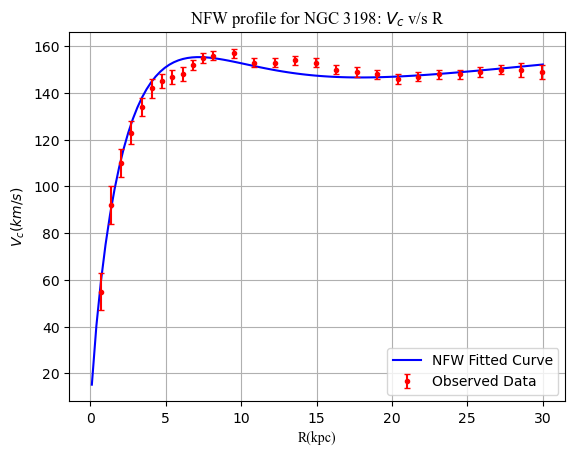

The opptimized values are: u_1=34.822631853547186 and u_2= 61.8098952264412 


In [7]:
R_D = 2.63   
u_0 = 35680
def calculate_v(r, u_1, u_2):#NGC 3198
    y = r / (2 * R_D)
    a = r/u_2
    b = u_1 * u_2 ** 3
    c = b/r
    term1 = u_0 * R_D * y**2 * (iv(0, y) * kv(0, y) - iv(1, y) * kv(1, y))
    term2 = np.log(1 + a) - a/(1+a)
    term3 = c * term2
    return np.sqrt(term1 + term3)
# Perform curve fitting
popt, pcov = curve_fit(calculate_v, NGC_3198_R, NGC_3198_V, p0=[100, 15])
# Get the optimized parameters
u_1_opt, u_2_opt = popt
# Generate the fitted curve using optimized parameters
r_values = np.linspace(0.1, 30, 100)
v_values = calculate_v(r_values, u_1_opt, u_2_opt)
# Plotting the graph
plt.plot(r_values, v_values, '-',color = 'Blue',label='NFW Fitted Curve')
plt.errorbar(NGC_3198_R, NGC_3198_V, yerr=error_3198, fmt='.',color = 'Red',capsize=2,label='Observed Data')
plt.xlabel('R(kpc)',fontfamily='Times New Roman')
plt.ylabel(r'$V_c(km/s)$', fontfamily='Times New Roman')
plt.title(r'NFW profile for NGC 3198: $V_c$ v/s R',fontfamily='Times New Roman')
plt.grid(True)
plt.legend()
#plt.savefig('NFW3198.png')
plt.show()
print(f"The opptimized values are: u_1={u_1_opt} and u_2= {u_2_opt} ")

In [8]:
'''def calculate_v(r, r_c, rho_0):
    t = (r / r_c)
    t1 = t * (1 + t) ** 2
    rhor = rho_0 / t1
    return (rhor)

r_values = np.geomspace(0.1, 100, 1000)  # Generate points in geometric progression
r_c = 61.8098952264412
rho_0 = 34.822631853547186
v_values = calculate_v(r_values, r_c, rho_0)

# Calculate the logarithms of the values
log_rhor_rho_0 = np.log(v_values / rho_0)
log_r_r_c = np.log(r_values / r_c)

# Set the tick locations and labels for x-axis and y-axis
x_ticks = np.log(np.array([10**(-4),10**(-3),10**(-2),10**(-1), 1, 10])) 
x_labels = ['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$', '$10^{0}$', '10']
plt.xticks(x_ticks, x_labels)

y_ticks = np.log(np.array([10**(-2),10**(-1), 1, 10,10**(2),10**(3),10**(4)])) 
y_labels = ['0.01','0.1', '1', '10','$10^2$','$10^3$','$10^{4}$']
plt.yticks(y_ticks, y_labels)
# Plotting the graph
plt.plot(log_r_r_c, log_rhor_rho_0, '-', color='green')
plt.xlabel(r'$log(\frac {r}{r_c})$',fontfamily='Times New Roman')
plt.ylabel(r'$log(\frac{\rho}{\rho_0})$',fontfamily='Times New Roman')
plt.title('Density distribution Plot of NGC 3198',fontfamily='Times New Roman')
plt.grid(True)
plt.show()'''

"def calculate_v(r, r_c, rho_0):\n    t = (r / r_c)\n    t1 = t * (1 + t) ** 2\n    rhor = rho_0 / t1\n    return (rhor)\n\nr_values = np.geomspace(0.1, 100, 1000)  # Generate points in geometric progression\nr_c = 61.8098952264412\nrho_0 = 34.822631853547186\nv_values = calculate_v(r_values, r_c, rho_0)\n\n# Calculate the logarithms of the values\nlog_rhor_rho_0 = np.log(v_values / rho_0)\nlog_r_r_c = np.log(r_values / r_c)\n\n# Set the tick locations and labels for x-axis and y-axis\nx_ticks = np.log(np.array([10**(-4),10**(-3),10**(-2),10**(-1), 1, 10])) \nx_labels = ['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$', '$10^{0}$', '10']\nplt.xticks(x_ticks, x_labels)\n\ny_ticks = np.log(np.array([10**(-2),10**(-1), 1, 10,10**(2),10**(3),10**(4)])) \ny_labels = ['0.01','0.1', '1', '10','$10^2$','$10^3$','$10^{4}$']\nplt.yticks(y_ticks, y_labels)\n# Plotting the graph\nplt.plot(log_r_r_c, log_rhor_rho_0, '-', color='green')\nplt.xlabel(r'$log(\x0crac {r}{r_c})$',fontfamily='Times New Rom

In [9]:
NGC_6503_R=np.array([0.65,1.43,2.15,2.87,3.58,4.3,5.02,5.73,6.45,7.17,7.88,8.6,9.32,10.03,10.75,11.47,12.18,12.9,13.62,14.33,15.05,15.77,16.48,17.2,17.92,18.63,19.35,20.07,20.78,21.5,22.22])
NGC_6503_V=np.array([77,100,110,118,121,121,117,116,116,116,115,115,116,117,117,118,117,116,115,117,116,115,115,115,114,115,114,116,115,118,115])
error_6503=np.array([10,5,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,4,4])

C:\Users\ayush\AppData\Local\Temp\ipykernel_3660\3656103927.py:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(term1 + term3)


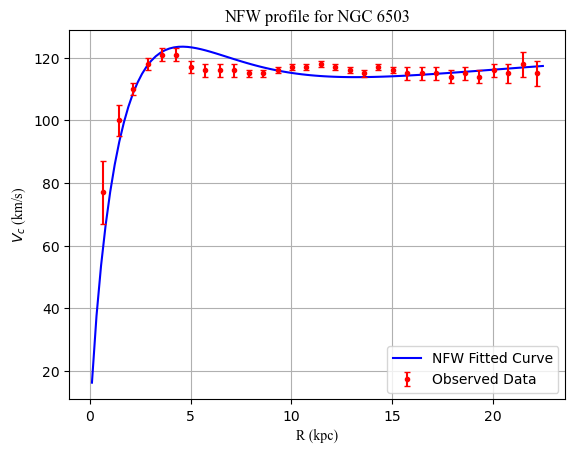

The opptimized values are: u_1=60.87432170786391 and u_2= 33.518701949321766 


In [10]:
u_0 = 35110.791
R_D = 1.72
def calculate_v(r, u_1, u_2):
    y = r / (2 * R_D)
    a = r / u_2
    b = u_1 * u_2 ** 3
    c = b / r
    term1 = u_0 * R_D * y ** 2 * (iv(0, y) * kv(0, y) - iv(1, y) * kv(1, y))
    term2 = np.log(1 + a) - a / (1 + a)
    term3 = c * term2
    return np.sqrt(term1 + term3)

# Perform curve fitting
popt, pcov = curve_fit(calculate_v, NGC_6503_R, NGC_6503_V, p0=[213, 15])
# Get the optimized parameters
u_1_opt, u_2_opt = popt
# Generate the fitted curve using optimized parameters
r_values = np.linspace(0.1, 22.5, 100)
v_values = calculate_v(r_values, u_1_opt, u_2_opt)
# Plotting the graph
plt.plot(r_values, v_values, '-', color='Blue', label='NFW Fitted Curve')
plt.errorbar(NGC_6503_R, NGC_6503_V, yerr=error_6503, fmt='.', color='Red', capsize=2, label='Observed Data')
plt.xlabel('R (kpc)', fontfamily='Times New Roman')
plt.ylabel(r'$V_c$ (km/s)', fontfamily='Times New Roman')
plt.title('NFW profile for NGC 6503', fontfamily='Times New Roman')
plt.grid(True)
plt.legend()
#plt.savefig('NFW6503.png')
plt.show()
print(f"The opptimized values are: u_1={u_1_opt} and u_2= {u_2_opt} ")

In [11]:
'''def calculate_v(r, r_c, rho_0):
    t = (r / r_c)
    t1 = t * (1 + t) ** 2
    rhor = rho_0 / t1
    return (rhor)

r_values = np.geomspace(0.1, 100, 1000)  # Generate points in geometric progression
r_c = 33.518701949321766
rho_0 = 60.87432170786391
v_values = calculate_v(r_values, r_c, rho_0)

# Calculate the logarithms of the values
log_rhor_rho_0 = np.log(v_values / rho_0)
log_r_r_c = np.log(r_values / r_c)

# Set the tick locations and labels for x-axis and y-axis
x_ticks = np.log(np.array([10**(-4),10**(-3),10**(-2),10**(-1), 1, 10])) 
x_labels = ['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$', '$10^{0}$', '10']
plt.xticks(x_ticks, x_labels)

y_ticks = np.log(np.array([10**(-2),10**(-1), 1, 10,10**(2),10**(3),10**(4)])) 
y_labels = ['0.01','0.1', '1', '10','$10^2$','$10^3$','$10^{4}$']
plt.yticks(y_ticks, y_labels)
# Plotting the graph
plt.plot(log_r_r_c, log_rhor_rho_0, '-', color='green')
plt.xlabel(r'$log(\frac {r}{r_c})$',fontfamily='Times New Roman')
plt.ylabel(r'$log(\frac{\rho}{\rho_0})$',fontfamily='Times New Roman')
plt.title('Density distribution Plot of NGC 6503',fontfamily='Times New Roman')
plt.grid(True)
plt.show()'''

"def calculate_v(r, r_c, rho_0):\n    t = (r / r_c)\n    t1 = t * (1 + t) ** 2\n    rhor = rho_0 / t1\n    return (rhor)\n\nr_values = np.geomspace(0.1, 100, 1000)  # Generate points in geometric progression\nr_c = 33.518701949321766\nrho_0 = 60.87432170786391\nv_values = calculate_v(r_values, r_c, rho_0)\n\n# Calculate the logarithms of the values\nlog_rhor_rho_0 = np.log(v_values / rho_0)\nlog_r_r_c = np.log(r_values / r_c)\n\n# Set the tick locations and labels for x-axis and y-axis\nx_ticks = np.log(np.array([10**(-4),10**(-3),10**(-2),10**(-1), 1, 10])) \nx_labels = ['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$', '$10^{0}$', '10']\nplt.xticks(x_ticks, x_labels)\n\ny_ticks = np.log(np.array([10**(-2),10**(-1), 1, 10,10**(2),10**(3),10**(4)])) \ny_labels = ['0.01','0.1', '1', '10','$10^2$','$10^3$','$10^{4}$']\nplt.yticks(y_ticks, y_labels)\n# Plotting the graph\nplt.plot(log_r_r_c, log_rhor_rho_0, '-', color='green')\nplt.xlabel(r'$log(\x0crac {r}{r_c})$',fontfamily='Times New Ro

In [12]:
NGC_2903_R=[0.31,0.62,0.93,1.24,1.55,1.86,2.17,2.48,2.79,3.1,3.41,3.72,4.65,5.58,6.51,7.44,8.37,9.3,10.23,11.16,12.09,13.02,13.95,14.88,15.81,16.74,17.67,18.6,19.53,20.46,21.39,22.32,23.25,24.18]
NGC_2903_V=[44,64,128,148,157,189,195,201,214,215,215,216,214,210,205,203,201,201,199,197,196,193,190,188,187,188,186,185,185,181,178,177,182,180]
error_2903=[8,8,8,8,8,8,6,6,4,4,4,3,2,2,2,1,1,1,1,1,2,3,3,5,5,3,3,3,3,3,3,3,4,4]

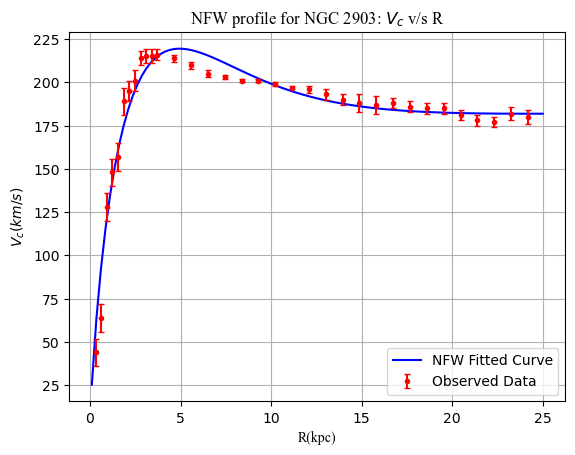

The opptimized values are: u_1=139.09810870380733 and u_2= 31.44258812064739 


In [13]:
R_D = 2   
u_0 = 102810.5045
def calculate_v(r, u_1, u_2):#NGC 2903
    y = r / (2 * R_D)
    a = r/u_2
    b = u_1 * u_2 ** 3
    c = b/r
    term1 = u_0 * R_D * y**2 * (iv(0, y) * kv(0, y) - iv(1, y) * kv(1, y))
    term2 = np.log(1 + a) - a/(1+a)
    term3 = c * term2
    return np.sqrt(term1 + term3)
# Perform curve fitting
popt, pcov = curve_fit(calculate_v, NGC_2903_R, NGC_2903_V, p0=[213, 15])
# Get the optimized parameters
u_1_opt, u_2_opt = popt
r_values = np.linspace(0.1, 25, 100)
v_values = calculate_v(r_values, u_1_opt, u_2_opt)
# Plotting the graph
plt.plot(r_values, v_values, '-',color = 'Blue',label='NFW Fitted Curve')
plt.errorbar(NGC_2903_R, NGC_2903_V, yerr=error_2903, fmt='.',color = 'Red',capsize=2, label='Observed Data')
plt.xlabel('R(kpc)',fontfamily='Times New Roman')
plt.ylabel(r'$V_c(km/s)$', fontfamily='Times New Roman')
plt.title(r'NFW profile for NGC 2903: $V_c$ v/s R',fontfamily='Times New Roman')
plt.grid(True)
plt.legend(loc='lower right')
#plt.savefig('NFW2903.png')
plt.show()
print(f"The opptimized values are: u_1={u_1_opt} and u_2= {u_2_opt} ")

In [14]:
'''def calculate_v(r, r_c, rho_0):
    t = (r / r_c)
    t1 = t * (1 + t) ** 2
    rhor = rho_0 / t1
    return (rhor)

r_values = np.geomspace(0.1, 100, 1000)  # Generate points in geometric progression
r_c = 31.44258812064739
rho_0 = 139.09810870380733
v_values = calculate_v(r_values, r_c, rho_0)

# Calculate the logarithms of the values
log_rhor_rho_0 = np.log(v_values / rho_0)
log_r_r_c = np.log(r_values / r_c)

# Set the tick locations and labels for x-axis and y-axis
x_ticks = np.log(np.array([10**(-4),10**(-3),10**(-2),10**(-1), 1, 10])) 
x_labels = ['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$', '$10^{0}$', '10']
plt.xticks(x_ticks, x_labels)

y_ticks = np.log(np.array([10**(-2),10**(-1), 1, 10,10**(2),10**(3),10**(4)])) 
y_labels = ['0.01','0.1', '1', '10','$10^2$','$10^3$','$10^{4}$']
plt.yticks(y_ticks, y_labels)
# Plotting the graph
plt.plot(log_r_r_c, log_rhor_rho_0, '-', color='green')
plt.xlabel(r'$log(\frac {r}{r_c})$',fontfamily='Times New Roman')
plt.ylabel(r'$log(\frac{\rho}{\rho_0})$',fontfamily='Times New Roman')
plt.title('Density distribution Plot of NGC 2903',fontfamily='Times New Roman')
plt.grid(True)
plt.show()'''

"def calculate_v(r, r_c, rho_0):\n    t = (r / r_c)\n    t1 = t * (1 + t) ** 2\n    rhor = rho_0 / t1\n    return (rhor)\n\nr_values = np.geomspace(0.1, 100, 1000)  # Generate points in geometric progression\nr_c = 31.44258812064739\nrho_0 = 139.09810870380733\nv_values = calculate_v(r_values, r_c, rho_0)\n\n# Calculate the logarithms of the values\nlog_rhor_rho_0 = np.log(v_values / rho_0)\nlog_r_r_c = np.log(r_values / r_c)\n\n# Set the tick locations and labels for x-axis and y-axis\nx_ticks = np.log(np.array([10**(-4),10**(-3),10**(-2),10**(-1), 1, 10])) \nx_labels = ['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$', '$10^{0}$', '10']\nplt.xticks(x_ticks, x_labels)\n\ny_ticks = np.log(np.array([10**(-2),10**(-1), 1, 10,10**(2),10**(3),10**(4)])) \ny_labels = ['0.01','0.1', '1', '10','$10^2$','$10^3$','$10^{4}$']\nplt.yticks(y_ticks, y_labels)\n# Plotting the graph\nplt.plot(log_r_r_c, log_rhor_rho_0, '-', color='green')\nplt.xlabel(r'$log(\x0crac {r}{r_c})$',fontfamily='Times New Ro

# Disk with Arbitary surface mass density

